<a href="https://colab.research.google.com/github/ateyodin/game_classifier/blob/master/gamesC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
  !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from fastai.vision import *

In [0]:
folder = 'supern'
file = 'supern.txt'

In [0]:
path = Path('games')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
classes = ['nes','supern','n64','gamecube']

In [0]:
download_images('games/supern/supern.txt', dest, max_pics=100)

In [0]:
folder = 'n64'
file = 'n64.txt'

In [0]:
path = Path('games')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
classes = ['nes','supern','n64','gamecube']

In [0]:
download_images('games/n64/n64.txt', dest, max_pics=100)

In [0]:
folder = 'gamecube'
file = 'gamecube.txt'

In [0]:
path = Path('games')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
classes = ['nes','supern','n64','gamecube']

In [0]:
download_images('games/gamecube/gamec.txt', dest, max_pics=100)

In [0]:
folder = 'nes'
file = 'nes.txt'

In [0]:
path = Path('games')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
classes = ['nes','supern','n64','gamecube']

In [0]:
download_images('games/nes/nes.txt', dest, max_pics=100)

In [0]:
path = Path('games')

for c in classes:
  print(c)
  verify_images(path/c, delete=True, max_workers=8)

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=180, num_workers=4).normalize(imagenet_stats)

In [21]:
data.classes

['gamecube', 'n64', 'nes', 'supern']

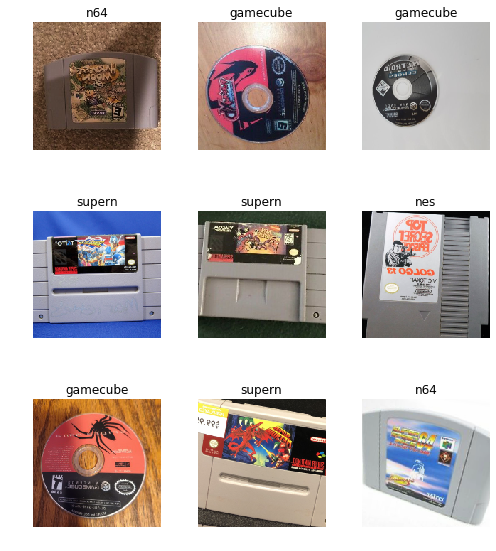

In [22]:
data.show_batch(rows=3, figsize=(7, 8))

In [23]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['gamecube', 'n64', 'nes', 'supern'], 4, 256, 64)

In [24]:
model_50 = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 85919911.77it/s]


In [25]:
model_50.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.250006,0.415883,0.156250,00:12
1,0.648665,0.071115,0.015625,00:10
2,0.427799,0.036360,0.015625,00:10
3,0.315293,0.031607,0.015625,00:10


In [0]:
model_50.save('stage-1')

In [0]:
model_50.unfreeze()

In [30]:
model_50.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


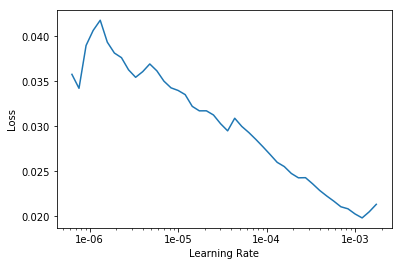

In [31]:
model_50.recorder.plot()

In [32]:
model_50.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.033539,0.040922,0.015625,00:10
1,0.030909,0.031950,0.015625,00:10


In [0]:
model_50.save('stage-2')

In [34]:
model_50.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (256 items)
x: ImageList
Image (3, 180, 180),Image (3, 180, 180),Image (3, 180, 180),Image (3, 180, 180),Image (3, 180, 180)
y: CategoryList
nes,nes,nes,nes,nes
Path: games;

Valid: LabelList (64 items)
x: ImageList
Image (3, 180, 180),Image (3, 180, 180),Image (3, 180, 180),Image (3, 180, 180),Image (3, 180, 180)
y: CategoryList
gamecube,n64,nes,nes,nes
Path: games;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, k

In [0]:
interpretation = ClassificationInterpretation.from_learner(model_50)

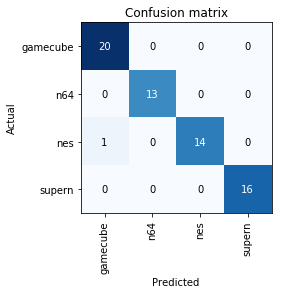

In [36]:
interpretation.plot_confusion_matrix()

In [0]:
img = open_image(path/'n64'/'00000021.jpg')

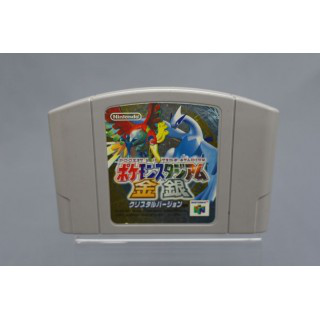

In [39]:
img

In [42]:
pred_class,pred_idx,outputs = model_50.predict(img)
pred_class

Category n64

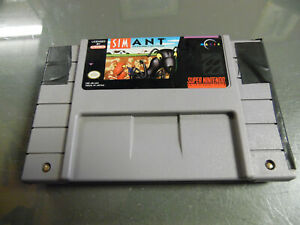

In [43]:
img = open_image(path/'supern'/'00000074.jpg')
img

In [44]:
pred_class,pred_idx,outputs = model_50.predict(img)
pred_class

Category supern

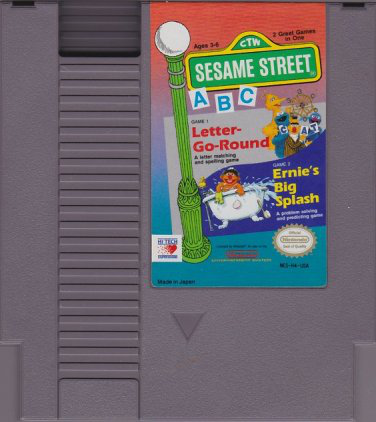

In [46]:
img = open_image(path/'nes'/'00000052.jpg')
img

In [47]:
pred_class,pred_idx,outputs = model_50.predict(img)
pred_class

Category nes